# Chapter 4 - Training Methods Code Reproduction

In [ ]:
# Impor umum
import numpy as np
import matplotlib.pyplot as plt

# Membuat data linear sederhana
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Menambahkan x0 = 1 ke setiap instance (untuk bias term)
X_b = np.c_[np.ones((100, 1)), X]

Theta terbaik (Normal Equation): [[4.16155805]
 [2.87824754]]
Prediksi baru: [[4.16155805]
 [9.91805314]]


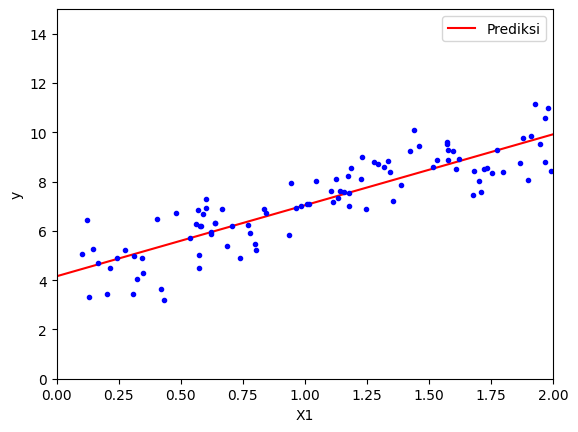


Intercept (Scikit-Learn): [4.16155805]
Coefficient (Scikit-Learn): [[2.87824754]]


In [ ]:
# Menghitung theta menggunakan Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta terbaik (Normal Equation):", theta_best)

# Membuat prediksi menggunakan theta yang ditemukan
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # tambahkan x0 = 1
y_predict = X_new_b.dot(theta_best)
print("Prediksi baru:", y_predict)

# Plot garis regresi
plt.plot(X_new, y_predict, "r-", label="Prediksi")
plt.plot(X, y, "b.")
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

# Melakukan hal yang sama menggunakan Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\nIntercept (Scikit-Learn):", lin_reg.intercept_)
print("Coefficient (Scikit-Learn):", lin_reg.coef_)

In [ ]:
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # Inisialisasi acak

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta terbaik (Batch GD):", theta)

Theta terbaik (Batch GD): [[4.16155805]
 [2.87824754]]


In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # Hyperparameter untuk learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # Inisialisasi acak

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta terbaik (SGD):", theta)

# Menggunakan Scikit-Learn SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # y.ravel() untuk mengubah y menjadi array 1D

print("\nIntercept (SGDRegressor):", sgd_reg.intercept_)
print("Coefficient (SGDRegressor):", sgd_reg.coef_)

Theta terbaik (SGD): [[4.14505832]
 [2.84568869]]

Intercept (SGDRegressor): [4.15079542]
Coefficient (SGDRegressor): [2.93374535]


Intercept (Polynomial): [2.10064591]
Coefficients (Polynomial): [[1.0065583  0.44380991]]


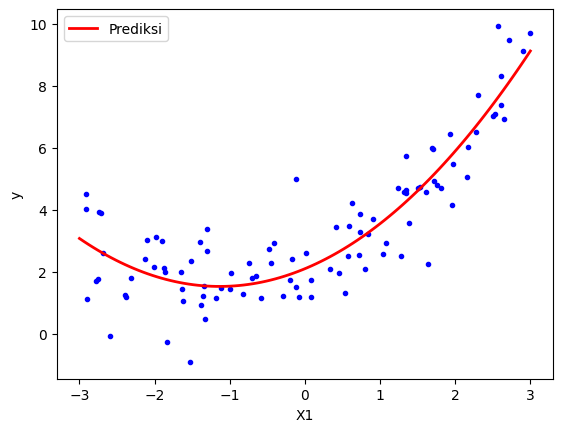

In [ ]:
# Membuat data non-linear
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Menambahkan fitur polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Melatih model Linear Regression pada fitur baru
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept (Polynomial):", lin_reg.intercept_)
print("Coefficients (Polynomial):", lin_reg.coef_)

# Plot hasil model polinomial
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediksi")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

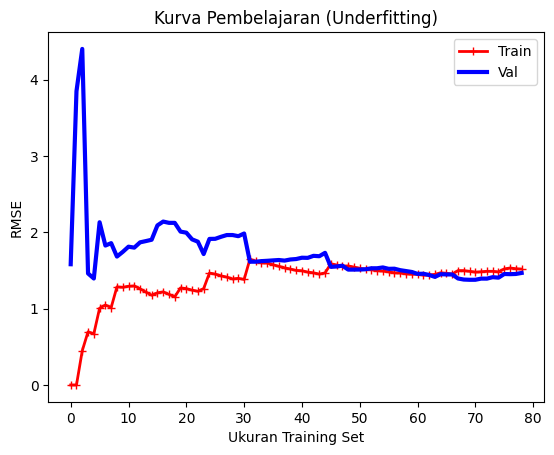

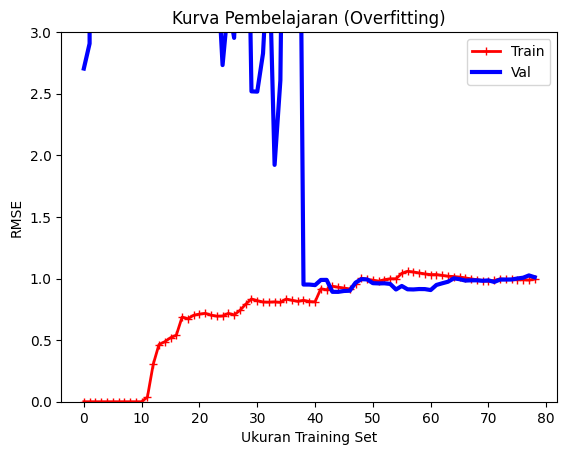

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.legend()
    plt.xlabel("Ukuran Training Set")
    plt.ylabel("RMSE")

# Kurva pembelajaran untuk model linear (underfitting)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Kurva Pembelajaran (Underfitting)")
plt.show()

# Kurva pembelajaran untuk model polinomial (overfitting)
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 3) # Batasi sumbu y untuk visualisasi yang lebih baik
plt.title("Kurva Pembelajaran (Overfitting)")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

# Membuat data baru
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Model Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print("Prediksi Ridge:", ridge_reg.predict([[1.5]]))

# Model Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Prediksi Lasso:", lasso_reg.predict([[1.5]]))

# Model Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print("Prediksi Elastic Net:", elastic_net.predict([[1.5]]))

Prediksi Ridge: [1.55071465]
Prediksi Lasso: [1.53788174]
Prediksi Elastic Net: [1.54333232]


In [ ]:
# Menyiapkan data
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2, random_state=10)

# Membuat pipeline
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # Lanjut training dari posisi terakhir
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # best_model = ... (salin modelnya) # perlu 'copy.deepcopy(model)'
        import copy
        best_model = copy.deepcopy(sgd_reg)


print("\nEpoch terbaik (Early Stopping):", best_epoch)
print("Error validasi terendah:", minimum_val_error)


Epoch terbaik (Early Stopping): 126
Error validasi terendah: 0.11943310678958635


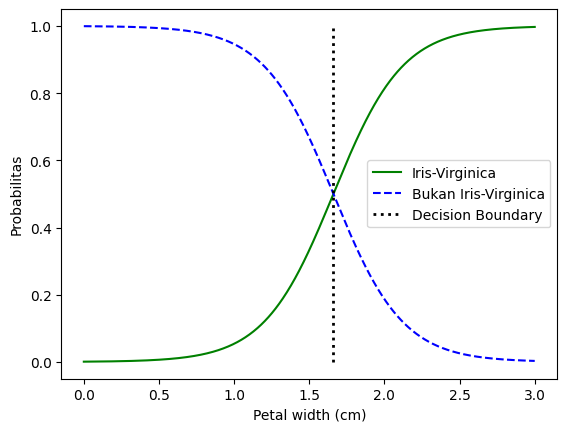

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, 3:]  # Petal width
y = (iris["target"] == 2).astype(int)  # 1 jika Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

# Plot probabilitas dan decision boundary
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Bukan Iris-Virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision Boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probabilitas")
plt.legend()
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # Petal length, petal width
y = iris["target"]

# Melatih model Softmax
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# Membuat prediksi
print("\nPrediksi Softmax untuk petal length=5, width=2:", softmax_reg.predict([[5, 2]]))
print("Probabilitas kelas (Softmax):", softmax_reg.predict_proba([[5, 2]]))


Prediksi Softmax untuk petal length=5, width=2: [2]
Probabilitas kelas (Softmax): [[6.21626375e-07 5.73689803e-02 9.42630398e-01]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
